## Splines ligados

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [25]:
x =[1,2,5,6,7,8,10,13,17,20,23,24,25,27,27.7,28,29,30] #Son tres conjutos de datos distintos
a = [3,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7.,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3.] #f(x)
dfx0=1.
#[1.,3.,.33]  #Condiciones de frontera 
dfxn=-.67
#[-.67,-4.,-1.5]

b_lists=[]
c_lists=[]
d_lists=[]

for i in range(len(x)):
    
    b_lists.append(np.zeros(len(x[i])))
    c_lists.append(np.zeros(len(x[i])))
    d_lists.append(np.zeros(len(x[i])))


In [27]:
n=len(x)-1

h = np.zeros(n)
alfa = np.zeros(n+1)

l = np.zeros(n+1)
nu = np.zeros(n+1)
z = np.zeros(n+1)

c = np.zeros(n+1)
b = np.zeros(n+1)
d = np.zeros(n+1)

for i in range(n):
    h[i]=x[i+1]-x[i]

alfa[0] = 3*(a[1]-a[0])/h[0]-3*dfx0
alfa[n] = 3*dfxn-3*(a[n]-a[n-1])/h[n-1]

for i in range(1,n):
    alfa[i]=3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]

l[0] = 2.*h[0]
nu[0] = .5 
z[0] = alfa[0]/l[0]

for i in range(1,n):
    l[i] = 2.*(x[i+1]-x[i-1]) - h[i-1]*nu[i-1]
    nu[i] = h[i]/l[i]
    z[i] = (alfa[i] - h[i-1]*z[i-1])/l[i]


l[n] = h[n-1]*(2.-nu[n-1])
z[n] = (alfa[n]-h[n-1]*z[n-1])/l[n]
c[n] = z[n]

for k in range(n-1,-1,-1):
    c[k] = z[k] - nu[k]*c[k+1]
    b[k] = (a[k+1] - a[k])/h[k] - h[k]*(c[k+1]+2.*c[k])/3.
    d[k] = (c[k+1] - c[k])/(3.*h[k])

#print(a_lists)
#print(b_lists)
#print(c_lists)
#print(d_lists)

print("a=", a)
print("b=", b)
print("c=", c)
print("d=", d)

('a=', [3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1, 4.3, 4.1, 3.0])
('b=', array([ 1.        ,  0.44677828, -0.07422623,  1.01567719,  1.41151748,
        0.5382529 ,  0.09744766, -0.56961765,  0.34495213,  0.48238077,
       -0.67447521, -0.16219304,  0.42324737, -1.91509812, -0.00665738,
        0.81936926, -1.01234231,  0.        ]))
('c=', array([-0.34677828, -0.20644344,  0.03277527,  1.05712815, -0.66128785,
       -0.21197673, -0.00842589, -0.21392921,  0.44257166, -0.39676211,
        0.01114345,  0.50113871,  0.08430169, -1.25347443,  3.97981834,
       -1.2263962 , -0.60531537,  0.94765769]))
('d=', array([ 0.04677828,  0.02657986,  0.34145096, -0.57280533,  0.14977038,
        0.03392514, -0.0228337 ,  0.05470841, -0.09325931,  0.04532284,
        0.16333175, -0.13894567, -0.22296269,  2.49204418, -5.78468283,
        0.20702694,  0.51765769,  0.        ]))


In [33]:
x_array = np.linspace(min(x),max(x),100)
y_array = []

for i in range(0,len(x_array)):
    for j in range(0,n):
        if x[j]<=x_array[i]<x[j+1]:
            s = a[j]+b[j]*(x_array[i]-x[j]) + c[j]*(x_array[i]-x[j])**2 + d[j]*(x_array[i]-x[j])**3
            y_array.append(s)
    if x_array[i]==x[n]:
        s = a[n]+b[n]*(x_array[i]-x[n]) + c[n]*(x_array[i]-x[n])**2 + d[n]*(x_array[i]-x[n])**3
        y_array.append(s)
        
print(len(x_array))
print(len(y_array))

100
100


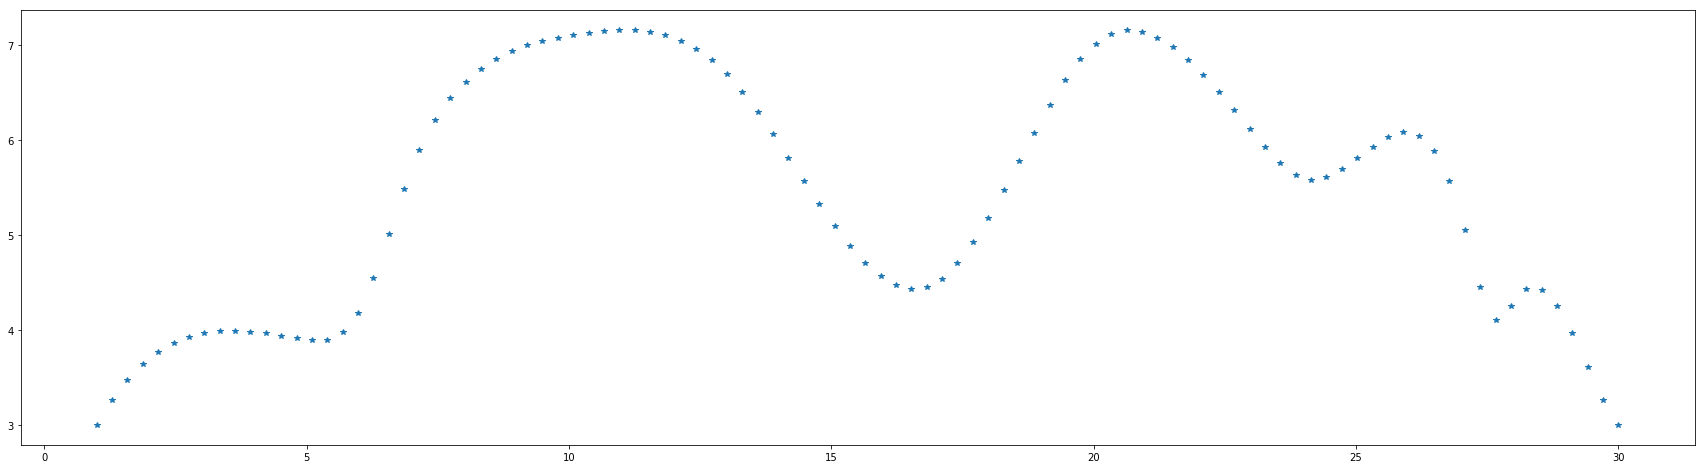

In [34]:
fig=plt.figure(figsize=(30,8))
ax=plt.axes()
#ax.plot(x_list,y_list)
ax.plot(x_array,y_array,'*')
plt.show()